In [1]:
import tweepy
import csv

#connect to twitter API using tweepy
consumer_key = 'x' #removed for security
consumer_secret = 'x' #removed for security
access_token = 'x' #removed for security
access_token_secret = 'x' #removed for security

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# open or create a file with csv writer
csvFile = open('tweets3.csv', 'a')
csvWriter = csv.writer(csvFile)

#collect tweets
for tweet in tweepy.Cursor(api.search,q='Yorkshire Water',count=5000, lang='en').items():
    if hasattr(tweet, "retweeted_status"):
        continue
    print(tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

Year 4 learning how to fix a leaking pipe at Yorkshire Water treatment site. https://t.co/k0zWJTXjPZ
Year 4 having lots of fun learning about water at Yorkshire Water in Headingly https://t.co/WKFPYhhos0
Yorkshire water: Next month I'll have had an aquarium for 12 months and I'm moving up to a… https://t.co/DEIye72pGg
Tonight from 8pm - @JDBakewell returns to our screens with a new episode of #LandscapeArtistoftheYear this week wel… https://t.co/8C0UQ2rkIq
So happy to be back in Yorkshire with actual nice quality water
A Greener Future For The Yorkshire Water Site At Esholt? https://t.co/R1Y53BPuQT
@timmcdonnell @mtredden @rachelmsavage Interesting problem! Often people prefer soft water for tea, and you can buy… https://t.co/x7EFBkADra
A lovely walk along the canal in Todmorden this afternoon - fabulous autumn colours again this year 🍃🍂🍁.
.
.
.
.… https://t.co/tPr5Eyu1Lg
Beavers are being enlisted by @ForestryCommEng to help prevent rivers from flooding. Up to eight beavers will be in

The EU provided Mem-Teq Ventures in Yorkshire with £109,101 to help investigate infectious diseases in water. See m… https://t.co/EVDqcxqXUH
#TakeOff from Studley Water Gardens, Fountains Abbey, Yorkshire https://t.co/4pD5j8znoi
@vestigyal Drinking Yorkshire water tbh https://t.co/wmuoFdnkvC
Renaissance English Artisan Small Batch Vodka. Distilled from East Anglian Sugar Beet &amp; Yorkshire Spring Water. Won… https://t.co/ZiHt0DD0Lx
Yorkshire Water is nice soft water so it's a long time before your kettle gets ruined
NEWS | Yorkshire Water employee recognised after raising £400,000 for WaterAid https://t.co/ieyPxuudHl
Happy Halloween  everyone here my  pumpkin for work. bit of compertion going on in the office today  at yorkshire w… https://t.co/LKo1Vn6ddH
“Choose wildlife or grouse shooting,” campaigners tell Yorkshire Water following key meeting.… https://t.co/V0slNtzfWo
What companies &amp; organisations in Yorkshire have a water stewardship group? #waterstewardship #water #environ

In [2]:
import nltk

In [3]:
from nltk.corpus import stopwords

In [4]:
from nltk.classify import SklearnClassifier

In [5]:
import pandas as pd

In [6]:
tweets = pd.read_csv('tweets3.csv',header=None,)

In [7]:
tweets.columns=['Date','Text']

In [10]:
tweets = pd.DataFrame.dropna(tweets)

In [8]:
tweets['Text'] = tweets['Text'].str.replace("[^a-zA-Z#]", " ")

In [9]:
tweets.head()

,Date,Text
0,05/11/2018 17:46,JHardacre It s must be a Yorkshire thing H...
1,NaN,NaN
2,05/11/2018 17:14,theseastrand in #Scarborough #Yorkshire are...
3,NaN,NaN
4,05/11/2018 16:58,JHardacre I d have thought the water board ...


In [29]:
#word cloud to visualise common words
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

# remove stop words from nltk stopwords dictionary, and append other common words specific with this data set
stopwords = nltk.corpus.stopwords.words('english')
newstopwords = ['Water','00pm','yall','xe','yorkshire','water', 'b,']
stopwords.extend(newstopwords)

# build the word cloud
def show_wordcloud(data, title = "Word Cloud on Tweets"):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=2000,
        max_font_size=50, 
        scale=30,
        random_state=0,
        colormap = 'Blues'
    ).generate(str(data))

    #plot the word cloud image
    fig = plt.figure(1, figsize=(20, 20),dpi=600)
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(tweets['Text'])


In [14]:
from textblob import TextBlob 
# textblob uses pattern library analyser which on a small dataset should improve accuracy over training on a subset of the limited data

In [15]:
TextBlob(tweets['Text'][0]).sentiment

Sentiment(polarity=0.43333333333333335, subjectivity=0.6333333333333333)

In [16]:
#create a new dataset from the sentiment scores
outlook = []

for line in tweets['Text']:
    outlook.append(TextBlob(line).sentiment)

In [17]:
#convert to a new dataframe
df = pd.DataFrame(outlook)

In [18]:
df.head()

,polarity,subjectivity
0,0.433333,0.633333
1,0.566667,0.666667
2,0.000000,0.000000
3,0.375000,0.750000
4,-0.035714,0.140476


In [19]:
import numpy as np

In [20]:
#add column to dataframe with labels if the sentiment is neutral, positive or negative
df['sentiment'] = np.where(df['polarity']==0, 'Neutral',df['polarity'])
df['sentiment'] = np.where(df['polarity']>=0.00001,'Positive',df['sentiment'])
df['sentiment'] = np.where(df['polarity']<=-0.00001, 'Negative',df['sentiment'])

In [22]:
df.head()

,polarity,subjectivity,sentiment
0,0.433333,0.633333,Positive
1,0.566667,0.666667,Positive
2,0.000000,0.000000,Neutral
3,0.375000,0.750000,Positive
4,-0.035714,0.140476,Negative


In [23]:
#counts for each sentiment type
(df['sentiment'].value_counts())

Neutral     348
Positive    337
Negative    122
Name: sentiment, dtype: int64

In [24]:
values = (df['sentiment'].value_counts())

In [30]:
#percentages for each sentiment type
print('Neutral percentage of responses:',(values[0]/values.sum())*100)
print('Positive percentage of responses:',(values[1]/values.sum())*100)
print('Negative percentage of responses:',(values[2]/values.sum())*100)

Neutral percentage of responses: 43.12267657992565
Positive percentage of responses: 41.759603469640645
Negative percentage of responses: 15.117719950433706


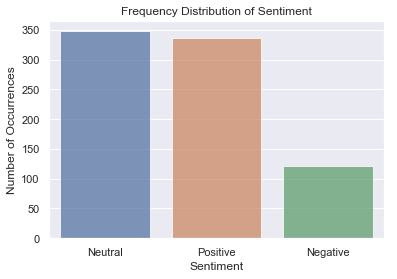

In [28]:
#bar plot for sentiment categories
import seaborn as sns
sns.set(style="darkgrid")
sns.barplot(values.index, values.values, alpha=0.75)
plt.title('Frequency Distribution of Sentiment')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()